# Exercise: Cascading Processes on Networks


In this exercise, we implement and analyse the models presented in Lecture.  We provide you with an almost complete mesa model that implements all the model variants discussed in the lecture.
Only the simplest *constant load inward and outward variants* are left out for you to implement. 
Then, with the model completed, you can analyse it in an interactive Jupyter Notebook.
This is a good general approach: writing the highly structured and reusable core code in python modules (or packages for more complex projects) and then calling that code in a Notebook in which you perform the analysis and generate results/reports.


### Tasks
1. **Complete the `inward` and `outward` model variants**  
    Inspect the code provided to you.
    You find incomplete code stubs starting on line 75 in `agent.py`, which you should complete.
    
2. **Test your implementation**  
    Run the model variant you implemented for known cascade processes and confirm the correctness of your implementation.
    
3. **Compute the $(\mu, \sigma)$ phase diagram seen in the lecture**  
    In the lecture you saw the results of calculations from the macroscopic perspective to the problem for varying means and variances of the load distribution.  Here, you are asked to reproduce the  $(\mu, \sigma)$ diagram through microscopic ABM simulation


In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from model import CascadeNetwork

## Task 2: run the model

Once you finish Task 1 (see above), you can test if the model works correctly.

The adjacency matrix, loads and capacities shown here are taken from the original paper by Lorenz et. al., 
`DOI: 10.1140/epjb/e2009-00347-4`

You can find the rest of the examples in the paper implemented in `test.py`.  
Note that you can run that file in command line and see the model evolution reported over time:
```
$ python3 test.py
Step 0:
Node 0 (Capacity = 1.7): Load 1.00, non-failed
Node 1 (Capacity = 1.7): Load 1.00, non-failed
Node 2 (Capacity = 1.3): Load 1.00, non-failed
Node 3 (Capacity = 1.3): Load 1.00, non-failed
...
```

In [2]:
adj_matrix = np.matrix([[0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 0],
                        [1, 1, 0, 1, 0, 0, 0, 0, 0],
                        [0, 0, 1, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 1, 0, 1, 1, 1, 1],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0],
                        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

load_vec_7 = [1, 1, 3.6, 1, 1, 1, 1, 1, 1]
capacity_vec_7 = [1.7, 1.7, 1.3, 1.3, 1.5, 1.55, 1.55, 1.55, 1.55]

In [3]:
# instantiate model and run it with model_type="constant", load_type="in" and test=True
# YOUR CODE HERE
my_model = CascadeNetwork(adj_matrix, load_vec_7, capacity_vec_7, "constant", "in", test=True)


/Users/almax/Documents/NTNU/24v/agent-based_modelling/agent_based_modeling_of_economic_systems/aes_env/lib/python3.11/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


#### Testing your implementation

Note, that it is difficult to judge if your implementation is correct from the above example.
Instead, try the model for a smaller network, for which first compute the cascade by hand. Then, compare the simulation and the result computed by hand.

In [4]:
## THIS TASK IS TECHNICALLY STRAIGHFORWARD TO DO, 
## AS YOU CAN JUST ADJUST THE VALUES IN THE ABOVE TWO CELLS
##
## INSTEAD, LET US HAVE SOME FUN HERE AND SEE IF WE CAN BUILD THE ADJACENCY MATRIX DIFFERENTLY

# Define how many nodes we want to have in the network
nnodes = 5
# Define the network by means of an "edge list"
edges = [
    (0,1),
    (0,2),
    (0,3),
    (3,4),
]

## Now, let us build the adjacency matrix from the edge list
## First, we create an 2 dimensional array of the correct size, populated with zeros (no edges)
adj_test = np.zeros((nnodes, nnodes))

## Next, we need to set to ones the elements that correspond to edges in the network
## A clean and readable solution is to write a for-loop:
for i,j in edges:
    adj_test[i,j] = 1

## Pay attention to the fact that we used tuple "unpacking"
## I.e., each step in the for loop is one edge, but one edge is a tuple of two elements
## So we assigned the variables i and j to the elements of this tuple in the same line as the for loop declaration


## Alternatively, let as do something less readable, but what showes some new functionality
adj_test1 = np.zeros((nnodes, nnodes))
adj_test1[tuple(zip(*edges))] = 1

print('Are the two matrices the same?')
print(adj_test == adj_test1)
## what we did above is to reshape `edges` into two tuples, ((0, 0, 0, 3), (1, 2, 3, 4)),
## which is a valid way to index multi-dimensional numpy arrays
## ( https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html#indexing-multi-dimensional-arrays )
## Here, pay attention to the very useful function `zip`, which does what the name says:
## it "zips" iterables elementwise, like the two zipper sides do on your jacket
## Interestingly, zip function is its own inverse function,
## i.e., it "unzips" a `zippedobject` if you do zip(*zippedobject)


## Now, let us assume our network is not directed
## To implement that, we need to make the adjacency matrix symmetric
## Given that we have each edge in the edge list only ones (as (i,j) or (j,i), but not both)
# We can get our undirected adjacency matrix by adding the transpose of the directed one to itself
adj_test += adj_test.T

print("\nOur adjacency matrix")
print(adj_test)

Are the two matrices the same?
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

Our adjacency matrix
[[0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


Now, let us run the *inward* and *outward* variants of the model for the given adjacency and the following loads and capacities.

You can confirm the correctness of the model dynamics by simple manual calculation based on formulas in Slides 15 and 20 of the lecture

In [5]:
load_vec_test = [0,0,0,0,0]
capacity_vec_test = [0, .7, .3, .8, .5]

In [7]:
# instantiate model and run it with model_type="constant", load_type="in" and test=True
# YOUR CODE HERE
my_model = CascadeNetwork(adj_test, load_vec_test, capacity_vec_test, "constant", "in", test=True)
num_steps = 10
for _ in range(num_steps):
    my_model.step()

Step 0:
Node 0 (Capacity = 0): Load 0.00, failing
Node 1 (Capacity = 0.7): Load 0.00, non-failed
Node 2 (Capacity = 0.3): Load 0.00, non-failed
Node 3 (Capacity = 0.8): Load 0.00, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 1:
Node 0 (Capacity = 0): Load 0.00, failed
Node 1 (Capacity = 0.7): Load 1.00, failing
Node 2 (Capacity = 0.3): Load 1.00, failing
Node 3 (Capacity = 0.8): Load 0.50, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 2:
Node 0 (Capacity = 0): Load 0.67, failed
Node 1 (Capacity = 0.7): Load 1.00, failed
Node 2 (Capacity = 0.3): Load 1.00, failed
Node 3 (Capacity = 0.8): Load 0.50, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 3:
Node 0 (Capacity = 0): Load 0.67, failed
Node 1 (Capacity = 0.7): Load 1.00, failed
Node 2 (Capacity = 0.3): Lo

In [8]:
# instantiate model and run it with model_type="constant", load_type="out" and test=True
# YOUR CODE HERE
out_model = CascadeNetwork(adj_test, load_vec_test, capacity_vec_test, "constant", "out", test=True)
for _ in range(num_steps):
    out_model.step()

Step 0:
Node 0 (Capacity = 0): Load 0.00, failing
Node 1 (Capacity = 0.7): Load 0.00, non-failed
Node 2 (Capacity = 0.3): Load 0.00, non-failed
Node 3 (Capacity = 0.8): Load 0.00, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 1:
Node 0 (Capacity = 0): Load 0.00, failed
Node 1 (Capacity = 0.7): Load 0.33, non-failed
Node 2 (Capacity = 0.3): Load 0.33, failing
Node 3 (Capacity = 0.8): Load 0.33, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 2:
Node 0 (Capacity = 0): Load 1.00, failed
Node 1 (Capacity = 0.7): Load 0.33, non-failed
Node 2 (Capacity = 0.3): Load 0.33, failed
Node 3 (Capacity = 0.8): Load 0.33, non-failed
Node 4 (Capacity = 0.5): Load 0.00, non-failed
------------------------------------------------------------
Step 3:
Node 0 (Capacity = 0): Load 1.00, failed
Node 1 (Capacity = 0.7): Load 0.33, non-failed
Node 2 (Capacity

## Task 3: Phase diagram

In [9]:
def fraction_failed(model):
    """Return the fraction of the failed nodes for the given `model`"""
    states = [node.failed for node in model.schedule.agents]
    N = model.num_nodes
    return sum(states) / N

In [36]:
fixed_params = {'adj_matrix': adj_matrix,
                'load_vec': np.ones(adj_matrix.shape[0]), # all load equal to one
                'model_type': 'constant', 
                'load_type': 'in'}


mus = np.arange(0, 1, step=0.002) # step=0.002: 7 minutes!! Step=0.01: <1min
sigmas = np.arange(0, 1, step=0.002)
repetitions = 5

In [37]:
average_cascade_size = np.zeros((len(mus), len(sigmas)))

for i, mu in enumerate(mus):
    for j, sigma in enumerate(sigmas):
        sizes = []
        for _ in range(repetitions):
            # Generate capacity vector 'c_vec' using 'np.random.normal'
            c_vec = np.random.normal(loc=mu, scale=sigma, size=adj_matrix.shape[0]) # YOUR CODE HERE
            # Initialize model with 'c_vec' and 'fixed_params'
            model = CascadeNetwork(**fixed_params, capacity_vec=c_vec) # YOUR CODE HERE
            
            while model.running and model.schedule.steps < 100:
                model.schedule.steps += 1  # Simulate model step
                model.step()
            
            sizes.append(fraction_failed(model))
        
        average_cascade_size[i, j] = np.mean(sizes)

Now, let us plot the phase diagram.

Display the correct values of $\mu$ and $\sigma$ on the axes. Refer to `pyplot.imshow` documentation to learn how.

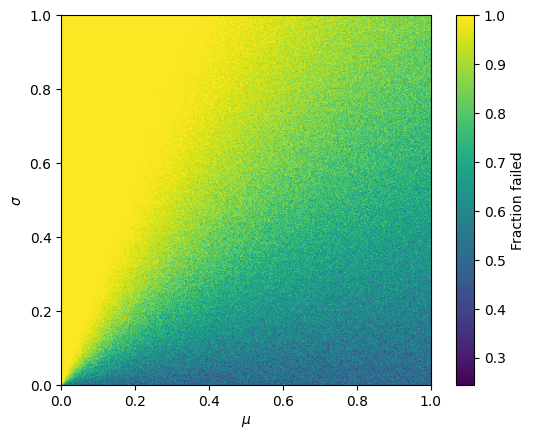

In [38]:
# YOU PLOTTING CODE HERE
fig = plt.figure()
im = plt.imshow(average_cascade_size, extent=(0,1,0,1))
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
fig.colorbar(im, label="Fraction failed")
plt.show()